# Google Stock Prediction Using RNN

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('../input/googlestockpricernn/Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
dataset = dataset.iloc[:,1:2].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

In [13]:
dataset

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [20]:
training_set = dataset[0:1257]
target_set = dataset[1:1258]

In [23]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [24]:
target_set

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [27]:
training_set = np.reshape(training_set,(1257,1,1))
target_set = np.reshape(target_set,(1257,1,1))

In [60]:
# Build RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [77]:
model = Sequential()
model.add(LSTM(units=4,
            activation='sigmoid',input_shape = (None,1)))
model.add(Dense(1))

In [78]:
model.compile(optimizer='adam',loss='mse')

In [101]:
model.fit(training_set,target_set,epochs=200,batch_size=32)

Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 3ms/step - loss: 4.0549e-04
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 4.0259e-04
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 3.9987e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 3.9709e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 3.9444e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 3.9049e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 3.8675e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 3.8479e-04
Epoch 107/200
40/40 [==============================] - 0s 3ms/step - loss: 3.8053e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 3.7985e-04
Epoch 109/200
40/40 [==============================] - 0s 3ms/step - loss: 3.7814e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.6313e-04
Epoch 195/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6147e-04
Epoch 196/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6225e-04
Epoch 197/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6481e-04
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7556e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6285e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6219e-04


In [109]:
test_set = pd.read_csv('../input/googlestockpricernn/Google_Stock_Price_Test.csv')
test_set = test_set.iloc[:,1:2].values
real_stock_price = test_set[0:19]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
test_set = sc.fit_transform(test_set)
test_set.shape

(20, 1)

In [110]:
google_test_stock = test_set[0:19]

In [111]:
google_test_stock = np.reshape(google_test_stock,(19,1,1))

In [112]:
google_test_stock

array([[[0.        ]],

       [[0.16186441]],

       [[0.12322034]],

       [[0.27881356]],

       [[0.46762712]],

       [[0.49237288]],

       [[0.44389831]],

       [[0.48016949]],

       [[0.4859322 ]],

       [[0.47915254]],

       [[0.45762712]],

       [[0.4459322 ]],

       [[0.47627119]],

       [[0.4820339 ]],

       [[0.73711864]],

       [[0.86118644]],

       [[1.        ]],

       [[0.94745763]],

       [[0.60762712]]])

In [113]:
predicted_stock_price = model.predict(google_test_stock)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [114]:
predicted_stock_price

array([[779.2596 ],
       [788.2611 ],
       [786.0515 ],
       [795.139  ],
       [806.62225],
       [808.1376 ],
       [805.16846],
       [807.3905 ],
       [807.74335],
       [807.3282 ],
       [806.0096 ],
       [805.2931 ],
       [807.1517 ],
       [807.50464],
       [822.76056],
       [829.6359 ],
       [836.666  ],
       [834.0957 ],
       [815.141  ]], dtype=float32)

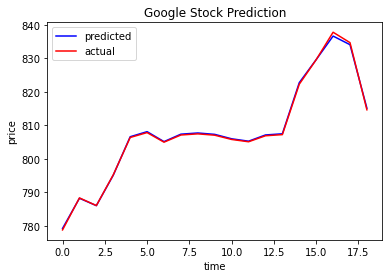

In [115]:
import matplotlib.pyplot as plt
plt.plot(predicted_stock_price,color='blue',label='predicted')
plt.plot(real_stock_price,color='red',label='actual')
plt.title('Google Stock Prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

## The Prediction is pretty much accurate. Keep in mind that we have predicted the stock price of next day, while we have price of today.